In [1]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='3bc7c480-fbdf-418d-8110-76c282d0f17a', project_access_token='p-8e7bcda5d8230f37d0bf9d6d411ecf37307a5b5c')
pc = project.project_context

## Capstone Project

In this code, I develop a model to rate wine based on its characteristics. The dataset is obtained from UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/wine+quality

In [ ]:
!pip install tensorflow==2.2.0rc0

In [ ]:
import tensorflow as tf
if not tf.__version__ == '2.2.0-rc0':
    print(tf.__version__)
    raise ValueError('please upgrade to TensorFlow 2.2.0-rc0, or restart your Kernel (Kernel->Restart & Clear Output)')

In [2]:
import numpy as np
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Activation
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sys
from queue import Queue
import pandas as pd
import json

In [5]:
project.get_assets()

[{'name': 'Advanced ML - Week 3',
  'asset_id': '453a0f47-5d1d-4d23-a0cf-5bf17b73dfa5',
  'type': 'notebook'},
 {'name': 'Assignment 4',
  'asset_id': 'c0dd2cb6-617f-40f2-9f10-894d52c58b96',
  'type': 'notebook'},
 {'name': 'Assignment 1',
  'asset_id': 'ad7dedd8-a7f8-41c1-988b-6d88597179b9',
  'type': 'notebook'},
 {'name': 'supertiny',
  'asset_id': 'c5f7f19c-dac3-4c13-82e1-3ef68a076aeb',
  'type': 'environment'},
 {'name': 'Applied AI - Week 2',
  'asset_id': '6b543ae5-89c6-427e-990a-5a06eba55b4f',
  'type': 'notebook'},
 {'name': 'Applied AI - Week 1',
  'asset_id': 'dc8c9a1a-c1e8-4656-bc8f-d26f03e05708',
  'type': 'notebook'},
 {'name': 'Applied AI - Week 3',
  'asset_id': '9483f61c-1d99-4e51-82d8-97cccb15063c',
  'type': 'notebook'},
 {'name': 'Applied AI - Week 4',
  'asset_id': 'c3556a47-2d87-46d7-b61b-31ab2efee2db',
  'type': 'notebook'},
 {'name': 'Notebook',
  'asset_id': 'aa555fff-c255-479d-95be-10e0ed565ce4',
  'type': 'notebook'},
 {'name': 'Assignment 2',
  'asset_id': '

### Importing data

In [3]:
# Fetch the file
my_file = project.get_file("winequality-red.csv")

# Read the CSV data file from the object storage into a pandas DataFrame
my_file.seek(0)
import pandas as pd
df = pd.read_csv(my_file)

In [4]:
df.head() # Success!

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Exploring data and variables

In [5]:
%matplotlib inline
len(df) # number of observations = 1599

1599

In [6]:
df.columns # lists columns/features in df

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
df[df.isna().any(axis=1)] # displays rows with missing values, luckily there are none!

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


### Box plots help visualize the distribution and see if there are outliers

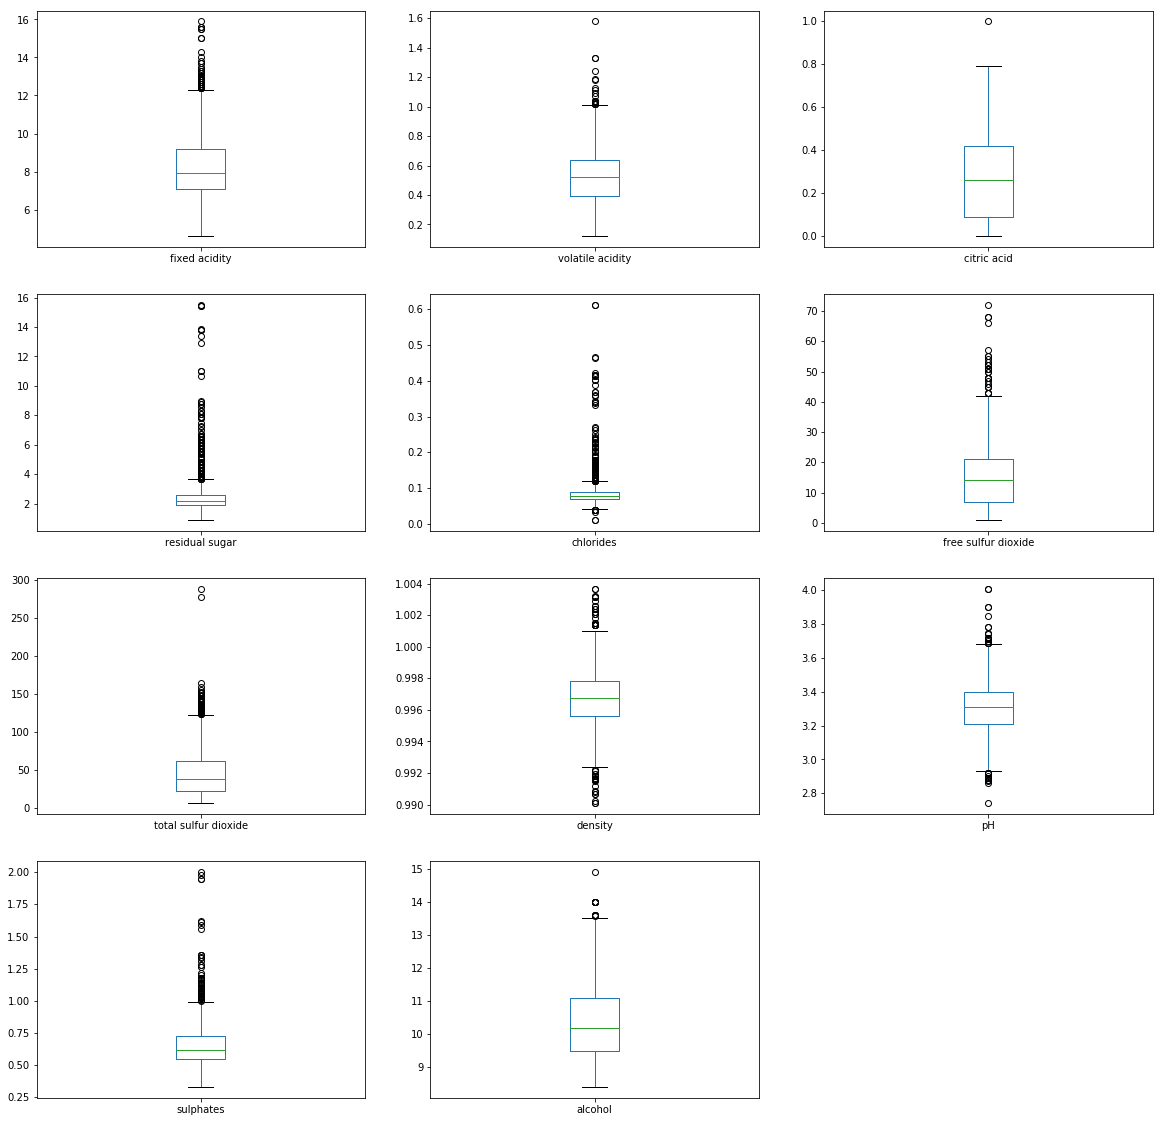

In [8]:
import matplotlib.pyplot as plt
df1 = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',\
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',\
       'pH', 'sulphates', 'alcohol']]
df1.plot(kind = 'box',subplots=True, layout=(4, 3), figsize=(20, 20), sharex=False);

### Density plots help visualize the distribution in a more intuitive format. and tell us about range of the variable

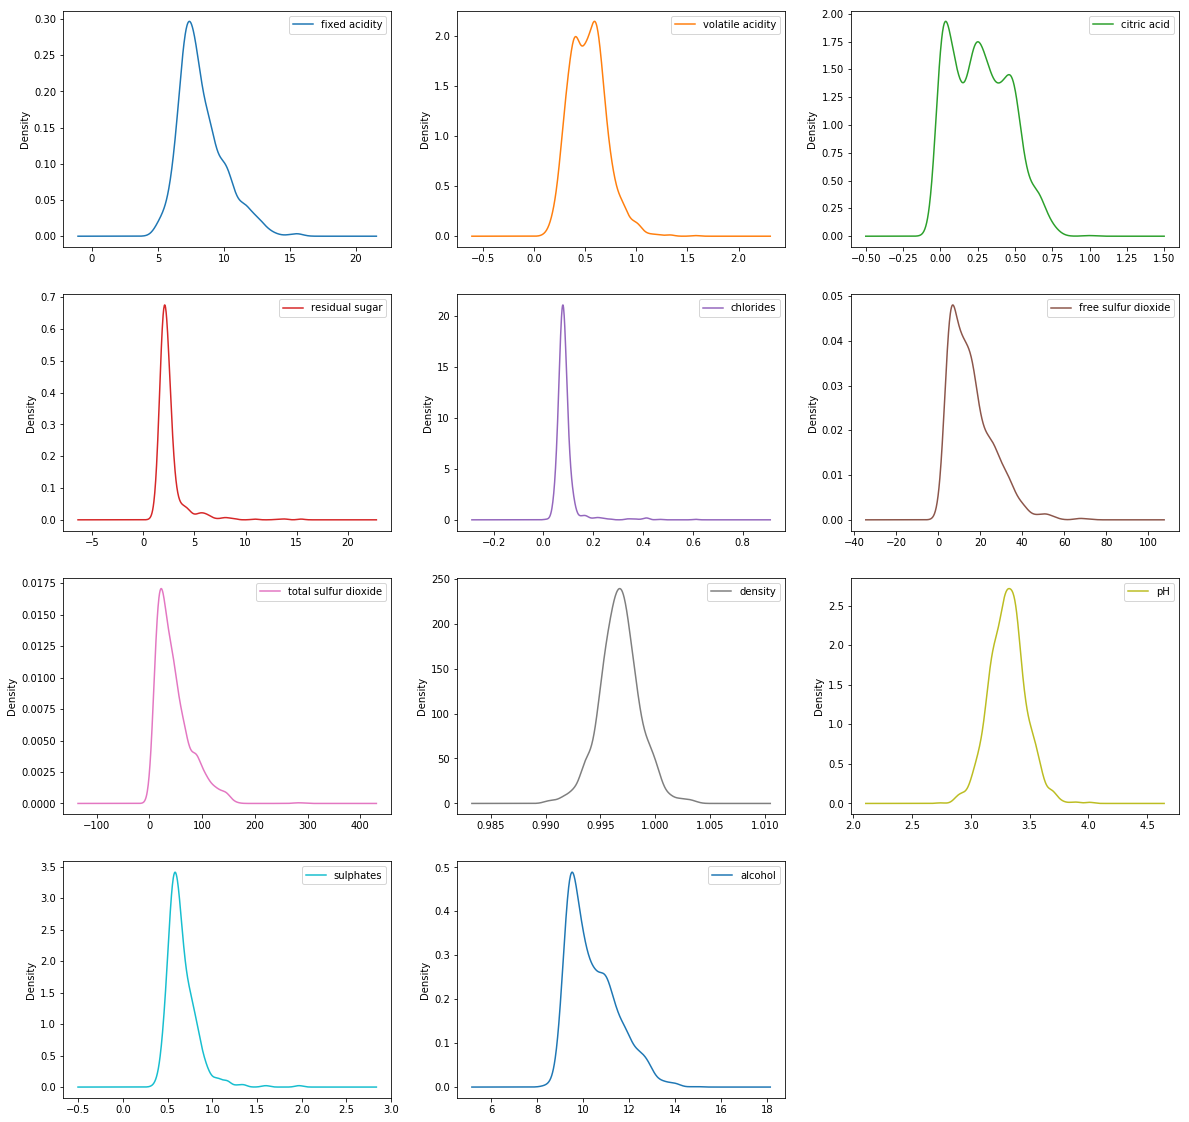

In [9]:
df1.plot(kind = 'kde',subplots=True, layout=(4, 3), figsize=(20, 20), sharex=False);

In [10]:
df.describe() ## helps see the key summary stats at a glance

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [17]:
df.corr() ## prints the correlation matrix to see what features matter most in determining the dependent variable (quality)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


Alcohol, sulphates, volatile acidity and citric acid are the 4 most important features in determining quality

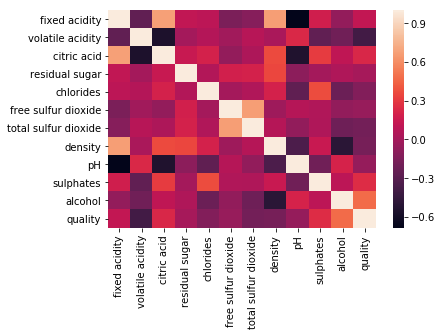

In [21]:
import seaborn as sn
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=False) # Visualizing correlation matrix

### Binary Classification
I arbitrarily define a rating of 6 or above as 'Good' and anything lower than 6 as 'Bad'. I add an additional column with 1s and 0s corresponding to Good and Bad ratings and use this as my dependent variable for training.

In [12]:
import sklearn as sk
from sklearn import svm
import pandas as pd
import os

good_ratings = [6,7,8,9,10]

def f(x):
    if (x in good_ratings):
        return(1)
    else:
        return(0)


df['Y'] = df['quality'].apply(f)

X = 


In [22]:
y = df.iloc[:,12]
X = df[['alcohol', 'sulphates', 'volatile acidity', 'citric acid']]
# X = df.iloc[:,:12]

In [23]:
SVM = svm.LinearSVC()
SVM.fit(X, y)
SVM.predict(X)
round(SVM.score(X,y),4)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.733

We get a prediction accuracy of about 73.3% with this simple binary classifier.

### Random Forests
Let's try something a little fancier i.e. a Random Forest Classifier with the same 4 features and max_depth = 5

In [27]:
import sklearn as sk
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, max_depth=5, random_state=0)
RF.fit(X, y)
RF.predict(X)
round(RF.score(X,y), 4)

0.7799

Clearly, this helped a little as it raised the accuracy to about 78%, but let's see if we can do even better.
Next, I'll build a k-means clustering model to see if there are any clusters in the data.

In [30]:
!pip install pyspark==2.4.5
from pyspark import SparkContext, SparkConf
from pyspark.sql import SQLContext, SparkSession
from pyspark.sql.types import StructType, StructField, DoubleType, IntegerType, StringType
sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))
from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .getOrCreate()
df = spark.createDataFrame(df)

     |████████████████████████████████| 217.8MB 196kB/s  eta 0:00:01
     |████████████████████████████████| 204kB 53.0MB/s eta 0:00:01
  Stored in directory: /home/dsxuser/.cache/pip/wheels/bf/db/04/61d66a5939364e756eb1c1be4ec5bdce6e04047fc7929a3c3c
Successfully built pyspark


In [32]:
df.createOrReplaceTempView("df")
spark.sql("SELECT * from df").show()

+-------------+----------------+-----------+--------------+-------------------+-------------------+--------------------+-------+----+---------+-------+-------+---+
|fixed acidity|volatile acidity|citric acid|residual sugar|          chlorides|free sulfur dioxide|total sulfur dioxide|density|  pH|sulphates|alcohol|quality|  Y|
+-------------+----------------+-----------+--------------+-------------------+-------------------+--------------------+-------+----+---------+-------+-------+---+
|          7.4|             0.7|        0.0|           1.9|              0.076|               11.0|                34.0| 0.9978|3.51|     0.56|    9.4|      5|  0|
|          7.8|            0.88|        0.0|           2.6|              0.098|               25.0|                67.0| 0.9968| 3.2|     0.68|    9.8|      5|  0|
|          7.8|            0.76|       0.04|           2.3|              0.092|               15.0|                54.0|  0.997|3.26|     0.65|    9.8|      5|  0|
|         11.2| 

In [33]:
from pyspark.ml.feature import VectorAssembler
vectorAssembler = VectorAssembler(inputCols=["volatile acidity","citric acid","sulphates", "alcohol"],
                                  outputCol="features")

In [34]:
from pyspark.ml.clustering import KMeans

clust = KMeans().setK(4).setSeed(1)

In [35]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages=[vectorAssembler, clust])
model = pipeline.fit(df)

In [36]:
prediction = model.transform(df)
prediction.show()

+-------------+----------------+-----------+--------------+-------------------+-------------------+--------------------+-------+----+---------+-------+-------+---+--------------------+----------+
|fixed acidity|volatile acidity|citric acid|residual sugar|          chlorides|free sulfur dioxide|total sulfur dioxide|density|  pH|sulphates|alcohol|quality|  Y|            features|prediction|
+-------------+----------------+-----------+--------------+-------------------+-------------------+--------------------+-------+----+---------+-------+-------+---+--------------------+----------+
|          7.4|             0.7|        0.0|           1.9|              0.076|               11.0|                34.0| 0.9978|3.51|     0.56|    9.4|      5|  0|  [0.7,0.0,0.56,9.4]|         1|
|          7.8|            0.88|        0.0|           2.6|              0.098|               25.0|                67.0| 0.9968| 3.2|     0.68|    9.8|      5|  0| [0.88,0.0,0.68,9.8]|         3|
|          7.8|     

In [40]:
prediction.createOrReplaceTempView('prediction')
spark.sql('''
select max(correct)/max(total) as accuracy from (

    select sum(correct) as correct, count(correct) as total from (
        select case when Y != prediction then 1 else 0 end as correct from prediction 
    ) 
    
    union
    
    select sum(correct) as correct, count(correct) as total from (
        select case when Y = prediction then 1 else 0 end as correct from prediction 
    ) 
)
''').rdd.map(lambda row: row.accuracy).collect()[0]

0.890556597873671

Looks like we're doing very well now, with over 89% prediction accuracy based on my arbitrary rating of 'good' for wines with quality rating of 6 or above!